# Image processing test of holography data

This is a simple test of image processing of a holographic image.

This notebook runs on python3 and uses the "%pylab inline" environment. This just loads a bunch of libraries and allows you to write sqrt(pi) for $\sqrt{\pi}$ instead of np.sqrt(np.pi) and 

    x = linspace(0,10,1e3)
    plot(x,sin(pi*x)) 

instead of 

    x = np.linspace(0,10,1e3)
    plt.plot(x,np.sin(np.pi*x)))

For image procesing, you also need the Python Image Library (PIL). To download it, simply download pillow via pip, i.e.:

    pip3 install pillow
    
There is a lot more that can be done with this library (rotating the image, getting contours, ex.), but this should provide a minimal working example.

In [2]:
# First load environment and libraries
%pylab inline
from scipy import misc,ndimage # used for image processing

Populating the interactive namespace from numpy and matplotlib


### First, we load and display the image file.

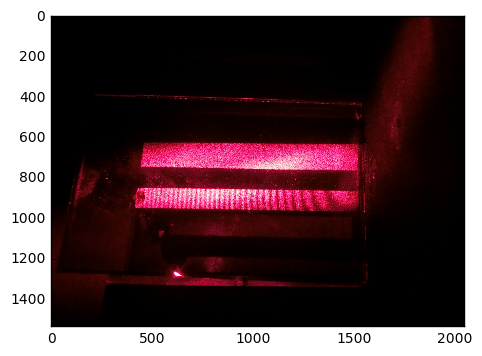

In [4]:
fname = '/Users/amacrae/Desktop/holo.jpg' # Insert your filename here
img = misc.imread(fname)
imshow(img)

The image is now loaded in the form of an NxMx3 matrix, the red(green,blue) pixel data is accessible via img[:,:,0] (img[:,:,1],img[:,:,2])

We can next clip the data to the relevant region:

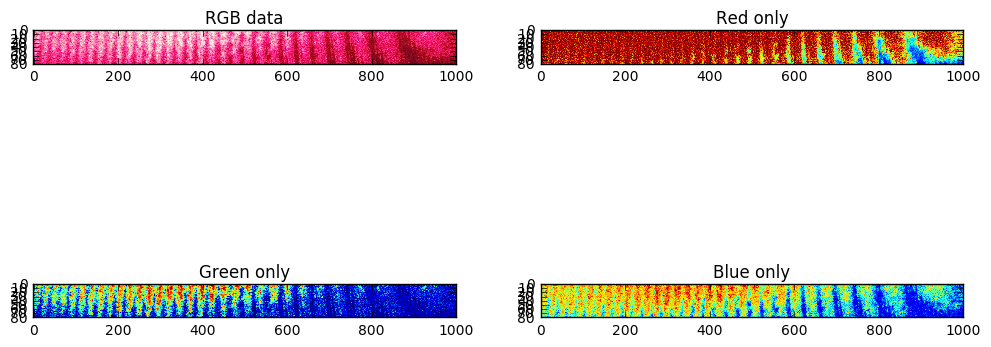

In [10]:
# Set the vertical/horizontal clipping boundaries
bY = 870
tY = 950
lX = 500
rX = 1500

figure(figsize = [12,6])
holo = (img[bY:tY,lX:rX,:])
subplot(221)
imshow(holo[:,:,:])
title('RGB data')
subplot(222)
imshow(holo[:,:,0])
title('Red only')
subplot(223)
imshow(holo[:,:,1])
title('Green only')
subplot(224)
imshow(holo[:,:,2])
title('Blue only')

We see that in this case the red data is totally saturated, but we can still see good contrast from the green and blue pixels. 

We now use one of these to extract the data:

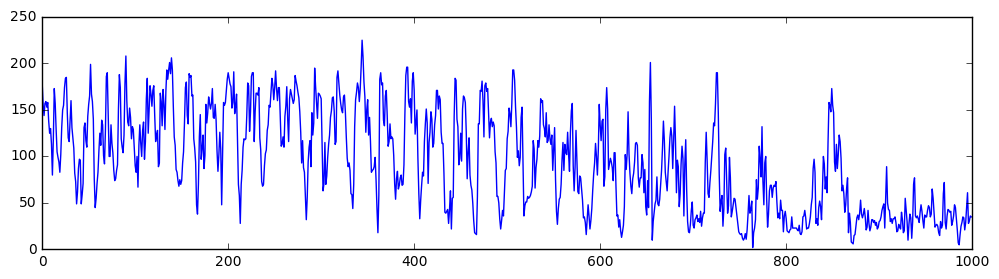

In [14]:
# Take a horizontal slice across the data
x = arange(1000)
y0 = holo[70,:,2]
figure(figsize=[12,3])
plot(x,y0)

The fringes are visible(ish) but there is tons of noise in the image which makes identifying fringes difficult. 

There are a number of ways to proceed from here: We can perform a running average, integrate along the vertical direction, or apply some image processing fitlers. I had the most luck with the latter.

To this end we can apply a Gaussian filter (normally, when you want to preserve edges, you use a median fitler, but that made this mage patchy in the fringes and Gaussian-blurring took care of the high frequency shot noise more effectively. 

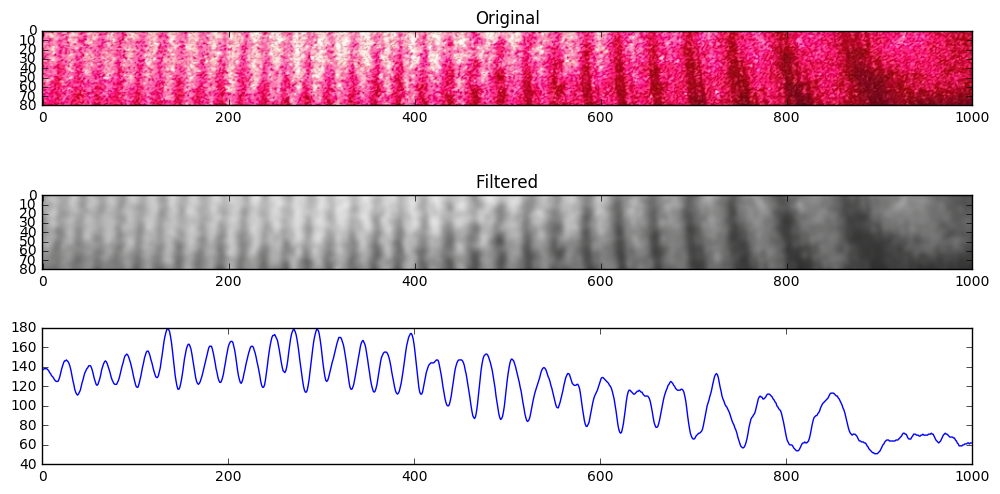

In [30]:
# imflt = ndimage.median_filter(imf,5)
figure(figsize(12,6))
holoflt = ndimage.gaussian_filter(holo, 3)
subplot(311)
imshow(holo)
title('Original')
subplot(312)
imshow(holoflt)
title('Filtered')
subplot(313)
# Take 1-D slices
y_slice = holoflt[70,:,2]
plot(x,y_slice)

That is already workable but to make it prettier, we can subtract the slowly varying offset.

To do so apply an insanely aggressive low pass filter and then subtract this from the original. I removed the edges because the algorithm I'm using does so. It wouldn't be hard to get around this using a smarter covolution.

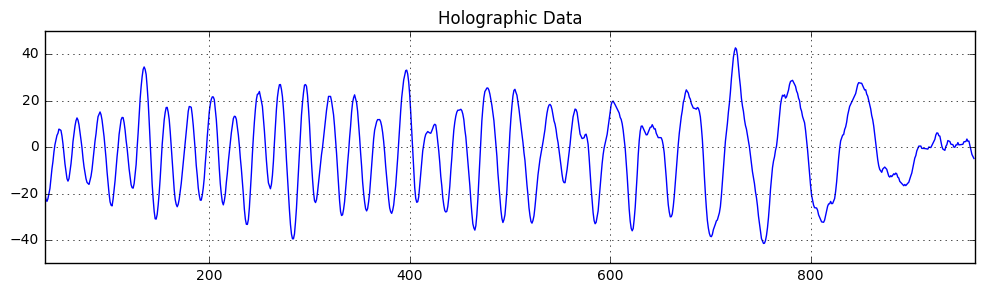

In [42]:
figure(figsize(12,3))
wnd= 36
longmean = convolve(y_slice,ones(2*wnd+1),mode = 'valid')
y_acflt = y_slice[wnd:-wnd]-longmean/(2*wnd)
plot(x[wnd:-wnd],y_acflt)
xlim([wnd,len(x)-wnd]);
grid(True)
title('Holographic Data')